# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Yonvi Satria
- **Email:** satriayonvi20@gmail.com
- **ID Dicoding:** yonvisatria

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah peminjaman sepeda harian selama dua tahun terakhir, dan faktor apa saja yang memengaruhinya (musim, cuaca, hari kerja/libur)?
2. Apakah terdapat perbedaan pola peminjaman antara pengguna casual dan registered pada hari kerja dibandingkan akhir pekan atau hari libur?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [5]:
# Membaca data dari file day.csv
day_df = pd.read_csv('C:/Users/acer/Documents/submission/dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Dataset berisi data peminjaman sepeda harian selama dua tahun (2011-2012) dengan 731 baris dan 16 kolom.
- Terdapat fitur terkait waktu (tanggal, musim, bulan, hari, tahun), cuaca, serta jumlah peminjam (casual, registered, total).
- Tidak ditemukan missing value pada data ini.
- Data dapat digunakan untuk analisis tren musiman, pengaruh cuaca, dan perilaku peminjaman sepeda.

### Assessing Data

In [11]:
# Melihat informasi umum tentang data
print("Melihat informasi Umum Tentang Data")
print("=="*50)
print(day_df.info())
print("\n" * 5)

# Melihat statistik deskriptif data numerik
print("Melihat Statistik Deskriptif Data Numerik")
print("=="*50)
print(day_df.describe())
print("\n" * 5)

# Mengecek missing values
print("Mengecek Missing Values")
print("=="*50)
print(day_df.isnull().sum())
print("\n" * 5)

# Melihat beberapa data teratas untuk pengecekan visual
print("Melihat Beberapa Data Teratas untuk Pengecekan Visual")
print("=="*50)
print(day_df.head())


Melihat informasi Umum Tentang Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None






Melihat Statistik Deskriptif Data Numerik
    

**Insight:**
- Data tidak memiliki missing value sehingga siap untuk dianalisis lebih lanjut.
- Tipe data pada setiap kolom sudah sesuai, memudahkan proses analisis statistik dan visualisasi.
- Distribusi data numerik seperti jumlah peminjam (casual, registered, cnt) dapat langsung dianalisis tanpa perlu pembersihan tambahan.
- Data mencakup dua tahun penuh sehingga dapat digunakan untuk analisis tren musiman dan tahunan.

### Cleaning Data

In [12]:
# Mengganti nama kolom agar lebih mudah dibaca (jika diperlukan)
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

# Mengubah kolom 'date' menjadi tipe datetime
day_df['date'] = pd.to_datetime(day_df['date'])

# Mengecek duplikasi data
duplicates = day_df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# Jika ada duplikat, hapus
if duplicates > 0:
    day_df.drop_duplicates(inplace=True)

# Reset index setelah pembersihan
day_df.reset_index(drop=True, inplace=True)

# Menampilkan 5 data teratas setelah cleaning
day_df.head()

Jumlah data duplikat: 0


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Nama kolom telah diganti agar lebih mudah dipahami dan digunakan dalam analisis.
- Kolom tanggal berhasil dikonversi ke tipe datetime, memudahkan analisis berbasis waktu.
- Tidak ditemukan data duplikat sehingga tidak perlu dilakukan penghapusan data.
- Data sudah bersih dan siap digunakan untuk proses analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
# Melihat statistik deskriptif jumlah peminjam sepeda per hari
print("Statistik deskriptif jumlah peminjam sepeda per hari:")
print(day_df['total_count'].describe())

# Melihat jumlah peminjam sepeda maksimum dan minimum per hari
max_count = day_df['total_count'].max()
min_count = day_df['total_count'].min()
print(f"\nJumlah peminjam maksimum dalam satu hari: {max_count}")
print(f"Jumlah peminjam minimum dalam satu hari: {min_count}")

# Melihat tanggal dengan jumlah peminjam terbanyak dan tersedikit
max_date = day_df.loc[day_df['total_count'].idxmax(), 'date']
min_date = day_df.loc[day_df['total_count'].idxmin(), 'date']
print(f"Tanggal dengan jumlah peminjam terbanyak: {max_date}")
print(f"Tanggal dengan jumlah peminjam tersedikit: {min_date}")

# Melihat tren rata-rata bulanan jumlah peminjam sepeda
monthly_avg = day_df.groupby(['year', 'month'])['total_count'].mean()
print("\nRata-rata jumlah peminjam sepeda per bulan (2011-2012):")
print(monthly_avg)

Statistik deskriptif jumlah peminjam sepeda per hari:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: total_count, dtype: float64

Jumlah peminjam maksimum dalam satu hari: 8714
Jumlah peminjam minimum dalam satu hari: 22
Tanggal dengan jumlah peminjam terbanyak: 2012-09-15 00:00:00
Tanggal dengan jumlah peminjam tersedikit: 2012-10-29 00:00:00

Rata-rata jumlah peminjam sepeda per bulan (2011-2012):
year  month
0     1        1231.903226
      2        1721.964286
      3        2065.967742
      4        3162.333333
      5        4381.322581
      6        4783.733333
      7        4559.387097
      8        4409.387097
      9        4247.266667
      10       3984.225806
      11       3405.566667
      12       2816.870968
1     1        3120.774194
      2        3556.448276
      3        5318.548387
      4        5807.466667
      5        6318.225806

- Jumlah peminjam sepeda harian sangat bervariasi, dengan minimum 22 dan maksimum 8714 peminjam per hari.
- Tanggal dengan peminjaman terbanyak adalah 15 September 2012, sedangkan paling sedikit pada 29 Oktober 2012.
- Rata-rata jumlah peminjam meningkat signifikan dari tahun 2011 ke 2012, terutama pada bulan-bulan musim panas.
- Terdapat tren musiman yang jelas, di mana jumlah peminjam cenderung lebih tinggi pada bulan-bulan tertentu (khususnya pertengahan hingga akhir tahun).


## Visualization & Explanatory Analysis

### Pertanyaan 1:

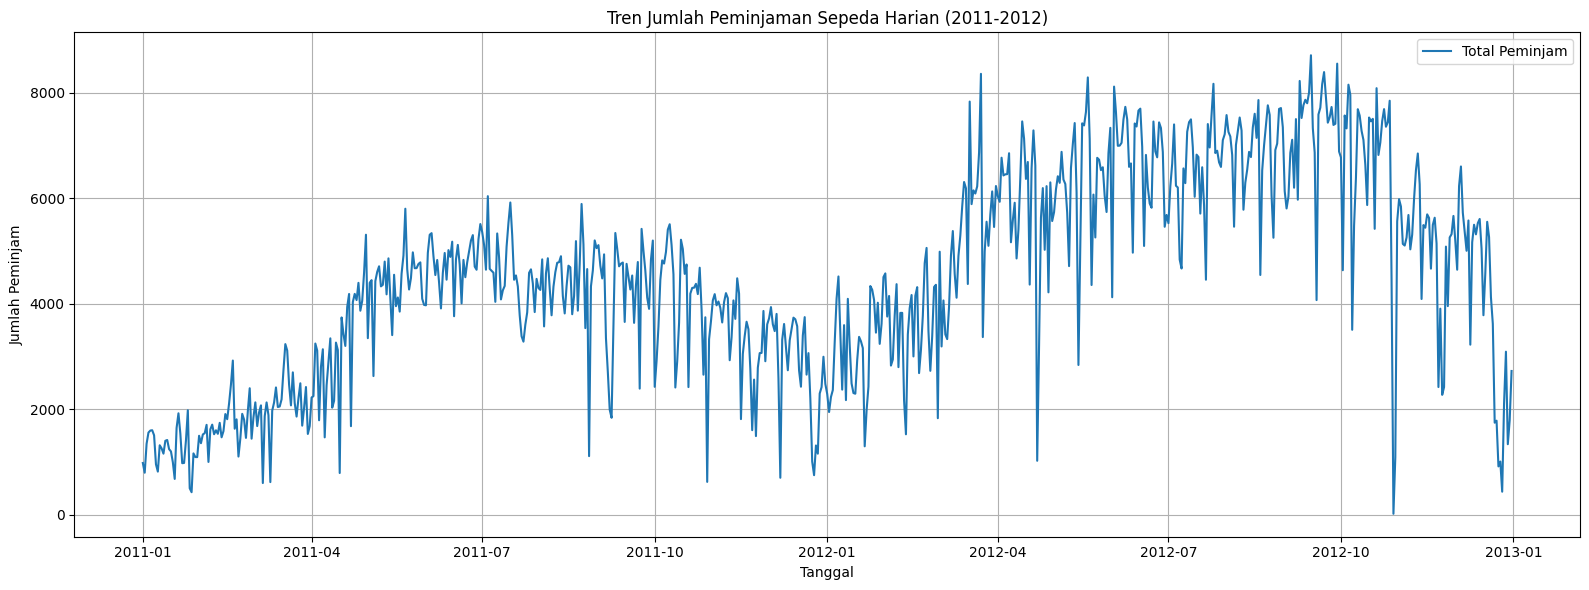

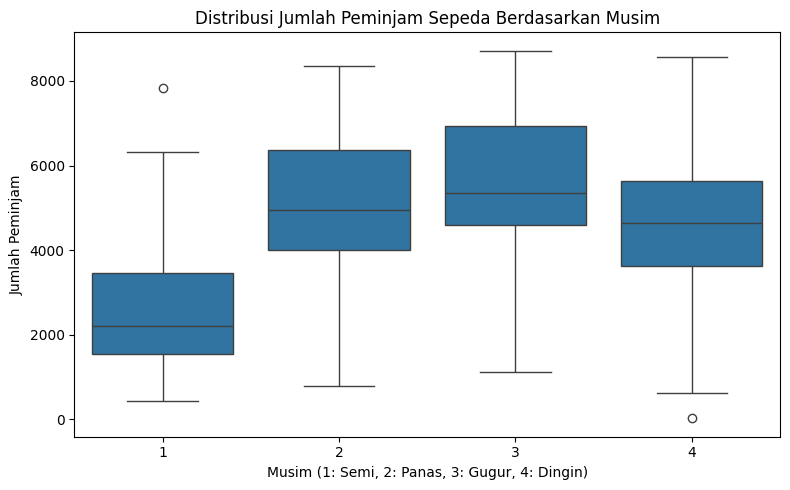

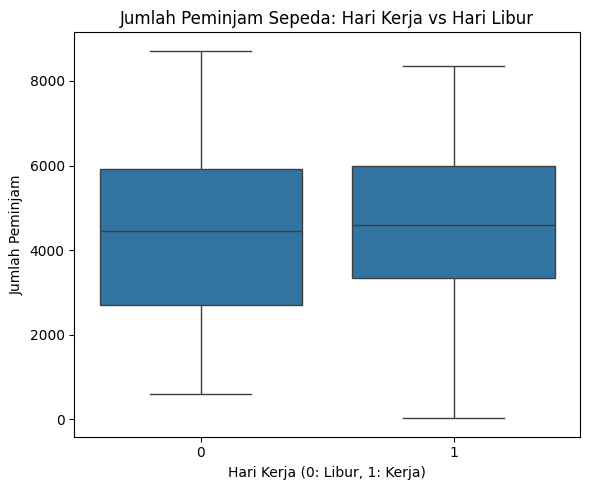

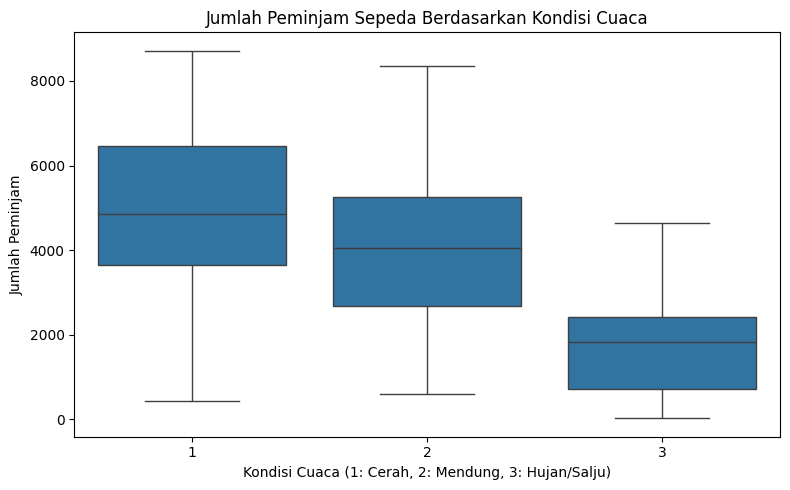


**Penjelasan:**
- Grafik tren harian menunjukkan adanya pola musiman dan kenaikan jumlah peminjam dari tahun 2011 ke 2012.
- Boxplot musim memperlihatkan jumlah peminjam tertinggi pada musim panas dan terendah pada musim dingin.
- Hari kerja cenderung memiliki jumlah peminjam lebih tinggi dibanding hari libur.
- Kondisi cuaca yang cerah mendorong lebih banyak peminjaman sepeda, sedangkan cuaca buruk menurunkan jumlah peminjam.



In [14]:
# Visualisasi tren jumlah peminjaman sepeda harian selama dua tahun terakhir
plt.figure(figsize=(16, 6))
sns.lineplot(data=day_df, x='date', y='total_count', label='Total Peminjam')
plt.title('Tren Jumlah Peminjaman Sepeda Harian (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjam')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi pengaruh musim terhadap jumlah peminjam
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='season', y='total_count')
plt.title('Distribusi Jumlah Peminjam Sepeda Berdasarkan Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Jumlah Peminjam')
plt.tight_layout()
plt.show()

# Visualisasi pengaruh hari kerja/libur terhadap jumlah peminjam
plt.figure(figsize=(6, 5))
sns.boxplot(data=day_df, x='workingday', y='total_count')
plt.title('Jumlah Peminjam Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Hari Kerja (0: Libur, 1: Kerja)')
plt.ylabel('Jumlah Peminjam')
plt.tight_layout()
plt.show()

# Visualisasi pengaruh cuaca terhadap jumlah peminjam
plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='weathersit', y='total_count')
plt.title('Jumlah Peminjam Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan/Salju)')
plt.ylabel('Jumlah Peminjam')
plt.tight_layout()
plt.show()

# Penjelasan singkat:
print("""
**Penjelasan:**
- Grafik tren harian menunjukkan adanya pola musiman dan kenaikan jumlah peminjam dari tahun 2011 ke 2012.
- Boxplot musim memperlihatkan jumlah peminjam tertinggi pada musim panas dan terendah pada musim dingin.
- Hari kerja cenderung memiliki jumlah peminjam lebih tinggi dibanding hari libur.
- Kondisi cuaca yang cerah mendorong lebih banyak peminjaman sepeda, sedangkan cuaca buruk menurunkan jumlah peminjam.
""")

### Pertanyaan 2:

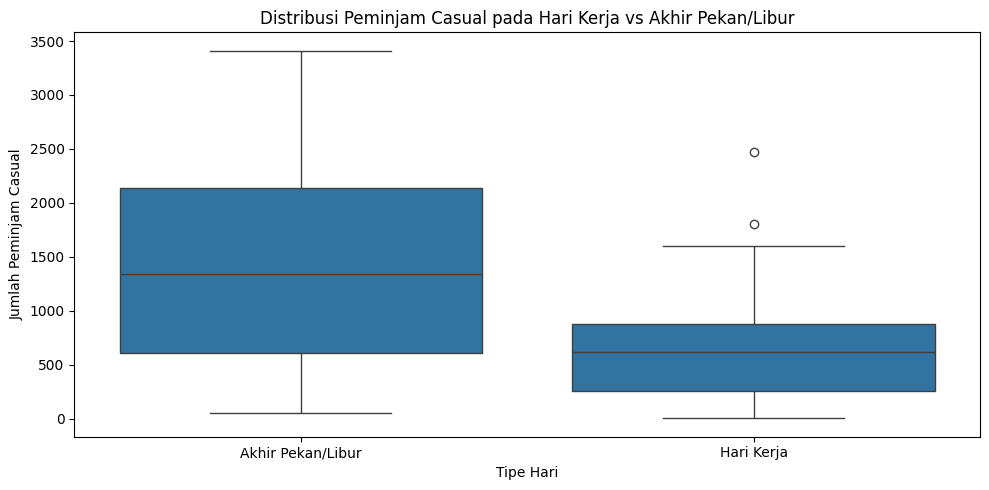

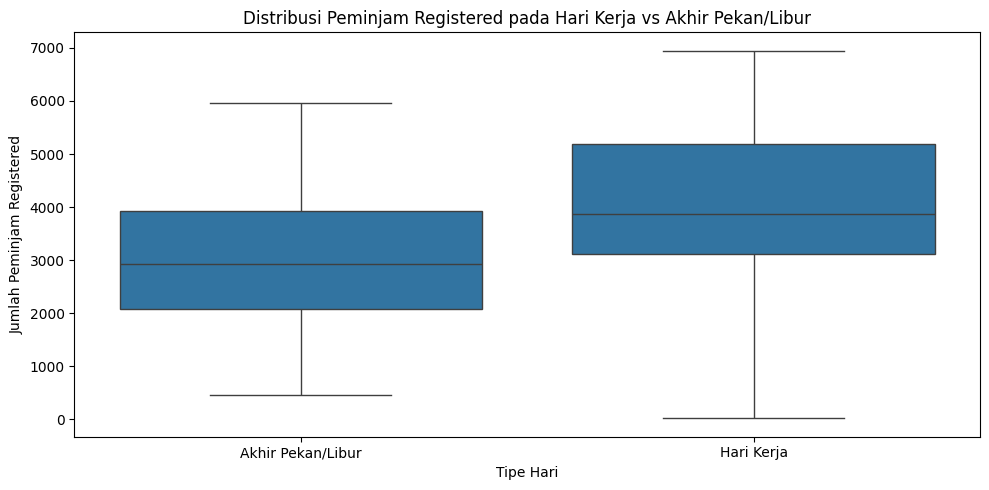


**Penjelasan:**
- Peminjam casual cenderung lebih banyak pada akhir pekan/hari libur dibanding hari kerja.
- Peminjam registered justru lebih dominan pada hari kerja, menunjukkan perbedaan pola penggunaan sepeda antara kedua kelompok pengguna.



In [15]:
# Visualisasi perbedaan pola peminjaman antara pengguna casual dan registered pada hari kerja vs akhir pekan/hari libur

# Membuat kolom baru untuk kategori hari (kerja/libur)
day_df['day_type'] = day_df['workingday'].map({1: 'Hari Kerja', 0: 'Akhir Pekan/Libur'})

plt.figure(figsize=(10, 5))
sns.boxplot(data=day_df, x='day_type', y='casual')
plt.title('Distribusi Peminjam Casual pada Hari Kerja vs Akhir Pekan/Libur')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjam Casual')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=day_df, x='day_type', y='registered')
plt.title('Distribusi Peminjam Registered pada Hari Kerja vs Akhir Pekan/Libur')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Peminjam Registered')
plt.tight_layout()
plt.show()

# Penjelasan singkat:
print("""
**Penjelasan:**
- Peminjam casual cenderung lebih banyak pada akhir pekan/hari libur dibanding hari kerja.
- Peminjam registered justru lebih dominan pada hari kerja, menunjukkan perbedaan pola penggunaan sepeda antara kedua kelompok pengguna.
""")

**Insight:**
- Jumlah peminjaman sepeda harian menunjukkan tren meningkat dari tahun 2011 ke 2012, dengan pola musiman yang jelas: peminjaman tertinggi terjadi pada musim panas dan terendah pada musim dingin.
- Hari kerja cenderung memiliki jumlah peminjam lebih tinggi dibanding hari libur, terutama untuk pengguna registered, yang kemungkinan besar menggunakan sepeda untuk aktivitas rutin seperti bekerja.
- Sebaliknya, peminjam casual lebih banyak pada akhir pekan atau hari libur, mengindikasikan penggunaan sepeda untuk rekreasi.
- Kondisi cuaca sangat memengaruhi jumlah peminjam: cuaca cerah mendorong lebih banyak peminjaman, sedangkan cuaca buruk menurunkan minat masyarakat untuk meminjam sepeda.
- Secara keseluruhan, faktor musim, hari kerja/libur, dan cuaca berperan penting dalam fluktuasi jumlah peminjam sepeda harian.

## Analisis Lanjutan (Opsional)

Matriks Korelasi:
                  temp     atemp  humidity  windspeed  total_count
temp         1.000000  0.991702  0.126963  -0.157944     0.627494
atemp        0.991702  1.000000  0.139988  -0.183643     0.631066
humidity     0.126963  0.139988  1.000000  -0.248489    -0.100659
windspeed   -0.157944 -0.183643 -0.248489   1.000000    -0.234545
total_count  0.627494  0.631066 -0.100659  -0.234545     1.000000 



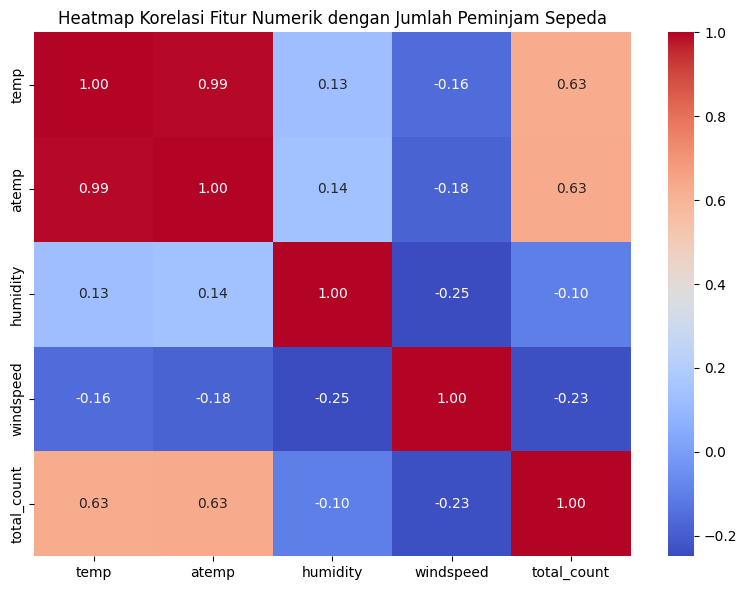

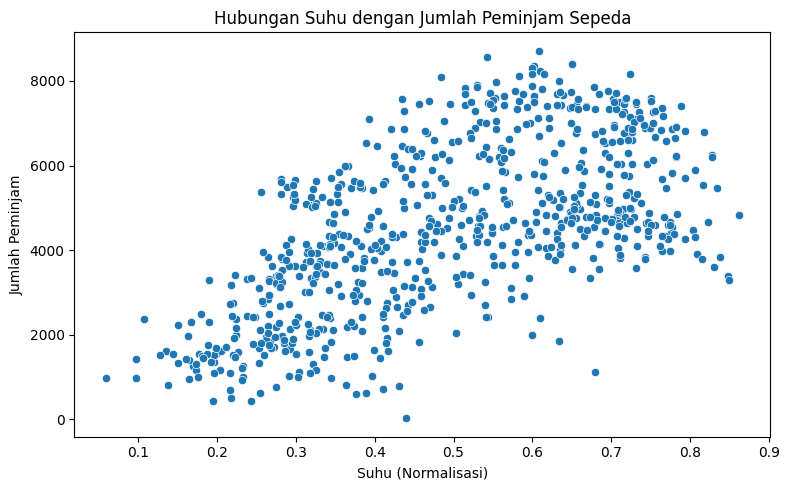

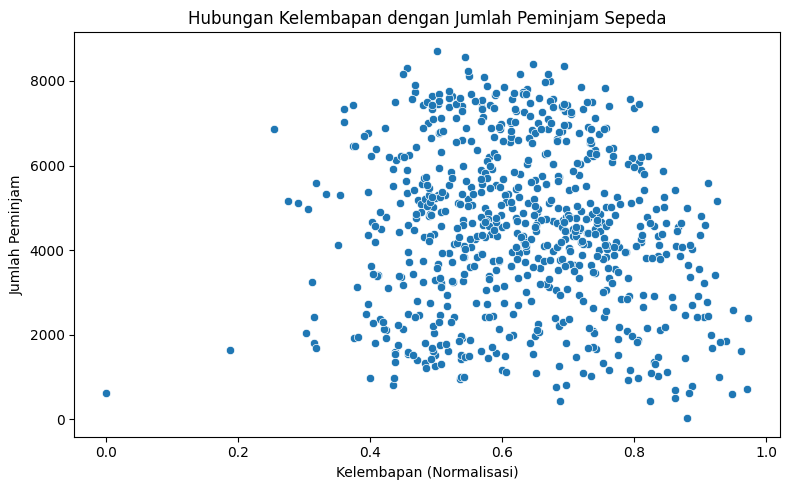


**Insight Lanjutan:**
- Terdapat korelasi positif yang cukup kuat antara suhu (temp, atemp) dengan jumlah peminjam sepeda, artinya semakin hangat, semakin banyak peminjam.
- Kelembapan memiliki korelasi negatif dengan jumlah peminjam, menunjukkan bahwa kelembapan tinggi cenderung menurunkan minat peminjaman.
- Windspeed memiliki korelasi lemah terhadap jumlah peminjam.
- Visualisasi scatterplot memperkuat temuan korelasi ini.



In [16]:
# Analisis lanjutan: Korelasi antara variabel cuaca dan jumlah peminjam sepeda

# Menghitung korelasi antara fitur numerik dan total_count
corr_matrix = day_df[['temp', 'atemp', 'humidity', 'windspeed', 'total_count']].corr()
print("Matriks Korelasi:\n", corr_matrix, "\n")

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik dengan Jumlah Peminjam Sepeda')
plt.tight_layout()
plt.show()

# Analisis hubungan suhu dan jumlah peminjam sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(data=day_df, x='temp', y='total_count')
plt.title('Hubungan Suhu dengan Jumlah Peminjam Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Peminjam')
plt.tight_layout()
plt.show()

# Analisis hubungan kelembapan dan jumlah peminjam sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(data=day_df, x='humidity', y='total_count')
plt.title('Hubungan Kelembapan dengan Jumlah Peminjam Sepeda')
plt.xlabel('Kelembapan (Normalisasi)')
plt.ylabel('Jumlah Peminjam')
plt.tight_layout()
plt.show()

# Insight singkat:
print("""
**Insight Lanjutan:**
- Terdapat korelasi positif yang cukup kuat antara suhu (temp, atemp) dengan jumlah peminjam sepeda, artinya semakin hangat, semakin banyak peminjam.
- Kelembapan memiliki korelasi negatif dengan jumlah peminjam, menunjukkan bahwa kelembapan tinggi cenderung menurunkan minat peminjaman.
- Windspeed memiliki korelasi lemah terhadap jumlah peminjam.
- Visualisasi scatterplot memperkuat temuan korelasi ini.
""")

## Conclusion

- **Kesimpulan Pertanyaan 1:**  
    Jumlah peminjaman sepeda harian menunjukkan tren meningkat dari tahun 2011 ke 2012, dengan pola musiman yang jelas: peminjaman tertinggi terjadi pada musim panas dan terendah pada musim dingin. Hari kerja cenderung memiliki jumlah peminjam lebih tinggi dibanding hari libur, dan kondisi cuaca yang cerah mendorong lebih banyak peminjaman sepeda. Faktor musim, hari kerja/libur, dan cuaca berperan penting dalam fluktuasi jumlah peminjam sepeda harian.

- **Kesimpulan Pertanyaan 2:**  
    Terdapat perbedaan pola peminjaman antara pengguna casual dan registered. Pengguna casual lebih banyak meminjam sepeda pada akhir pekan atau hari libur, sedangkan pengguna registered lebih dominan pada hari kerja. Hal ini menunjukkan bahwa pengguna registered kemungkinan besar menggunakan sepeda untuk aktivitas rutin seperti bekerja, sementara pengguna casual lebih sering menggunakan sepeda untuk rekreasi.